In [223]:
# Importação das bibliotecas
import warnings, requests, zipfile, io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff

In [224]:
# URL do arquivo zip
f_zip = 'https://archive.ics.uci.edu/static/public/212/vertebral+column.zip'

# Realiza o download do arquivo zip a partir da URL
r = requests.get(f_zip, stream=True)

# Converte o conteúdo baixado em um arquivo em memória e abre como um arquivo zip para manipulação
vertebral_zip = zipfile.ZipFile(io.BytesIO(r.content))

# Extrai todos os arquivos do zip para o diretório atual
vertebral_zip.extractall()

In [225]:
# Leitura dos arquivos
data = arff.loadarff('column_2C_weka.arff')

# Criação de um dataframe do pandas com os dados carregados
df = pd.DataFrame(data[0])

In [226]:
# Exploração de dados
df.shape

(310, 7)

In [227]:
# Listando os columns
df.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [228]:
# Verificação dos tipos das colunas
df.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [229]:
# Análise das estastísticas da primeira coluna
df['pelvic_incidence'].describe()

count    310.000000
mean      60.496653
std       17.236520
min       26.147921
25%       46.430294
50%       58.691038
75%       72.877696
max      129.834041
Name: pelvic_incidence, dtype: float64

In [230]:
# Análise das estastísticas gerais
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


<Axes: >

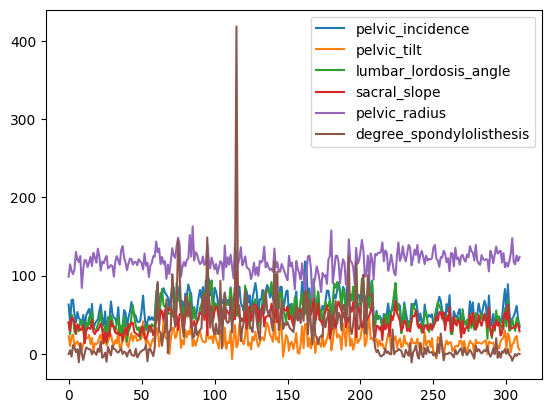

In [231]:
# Comando para garantir que os gráficos gerados sejam exibidos dentro do notebook
%matplotlib inline

# Criando o gráfico
df.plot()

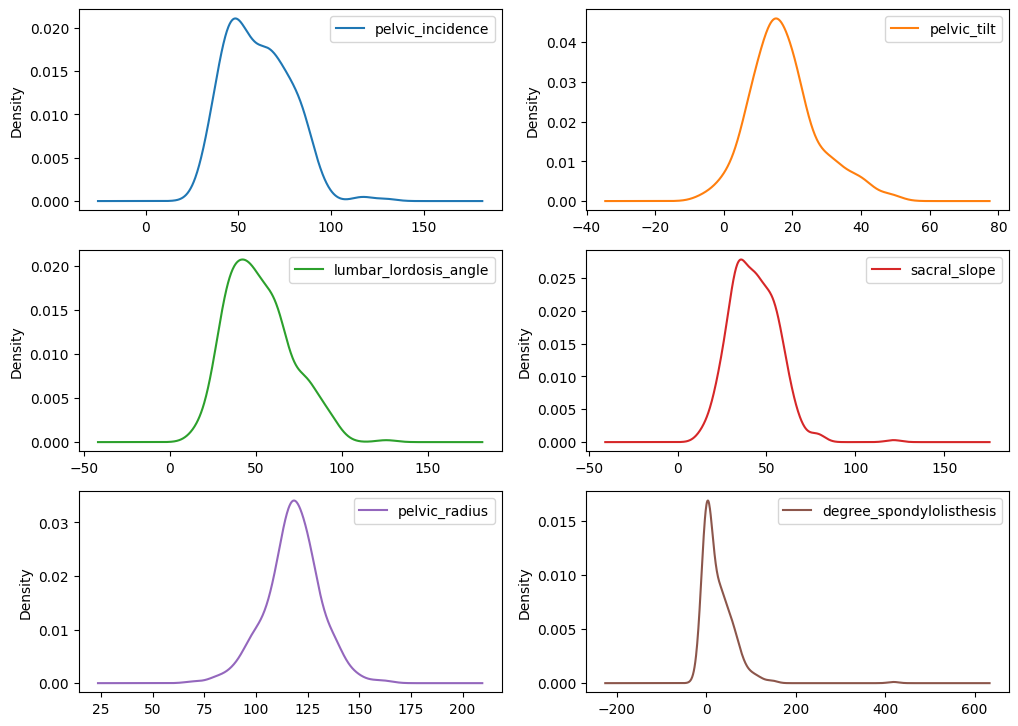

In [232]:
# Plotando os valores para cada componente
df.plot(kind='density', subplots=True, layout=(4,2), figsize=(12, 12), sharex=False)
plt.show()

<Axes: ylabel='Density'>

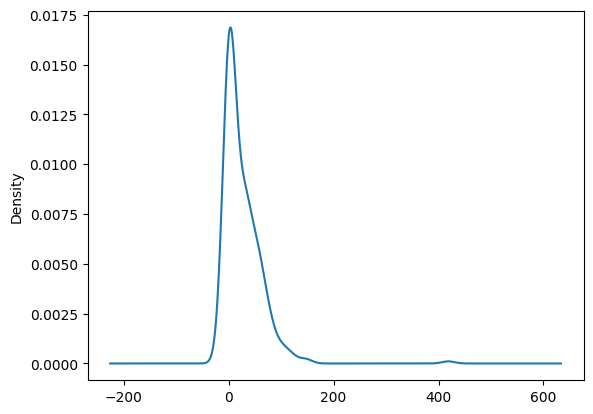

In [233]:
# Investigação da visualização
df['degree_spondylolisthesis'].plot.density()

<Axes: ylabel='Frequency'>

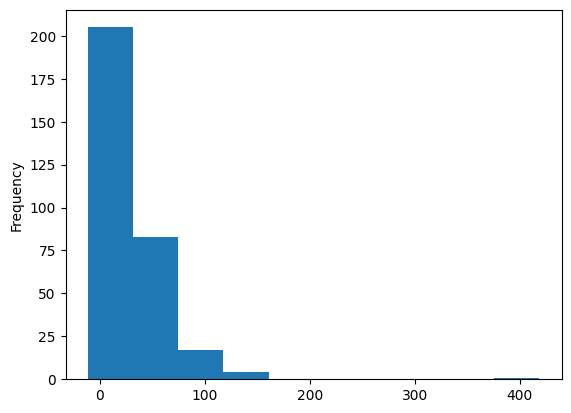

In [234]:
# Visuaização dos dados com histograma
df['degree_spondylolisthesis'].plot.hist()

<Axes: >

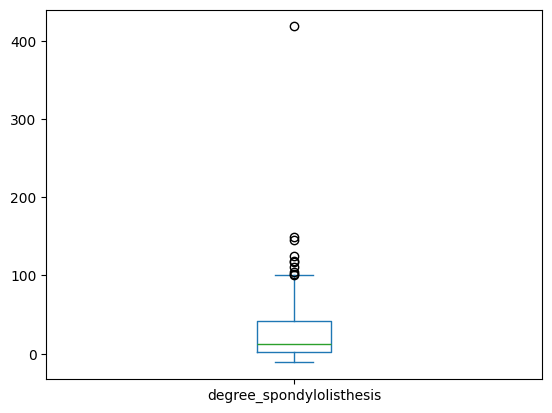

In [235]:
# Visualização das anomalias
df['degree_spondylolisthesis'].plot.box()

In [236]:
# Analisando o target (alvo)
df['class'].value_counts()

class
b'Abnormal'    210
b'Normal'      100
Name: count, dtype: int64

In [237]:
# Mapeando
class_mapper = {b'Abnormal':1, b'Normal':0}
df['class'] = df['class'].replace(class_mapper)

C:\Users\gabri\AppData\Local\Temp\ipykernel_8832\913068797.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace(class_mapper)


<Axes: xlabel='class', ylabel='degree_spondylolisthesis'>

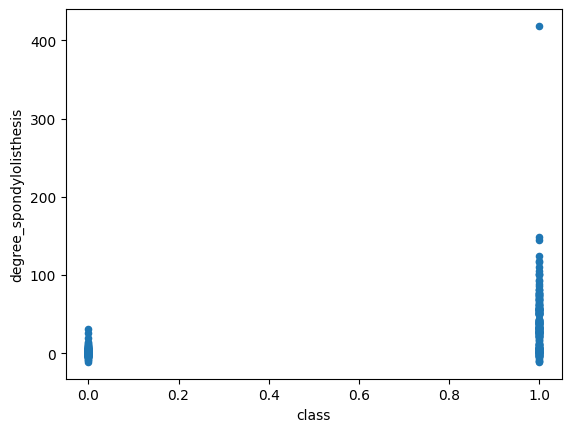

In [238]:
# Plotando o degree_spondylolisthesis para o target (alvo)
df.plot.scatter(y='degree_spondylolisthesis', x='class')

0         Axes(0.1,0.15;0.363636x0.75)
1    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

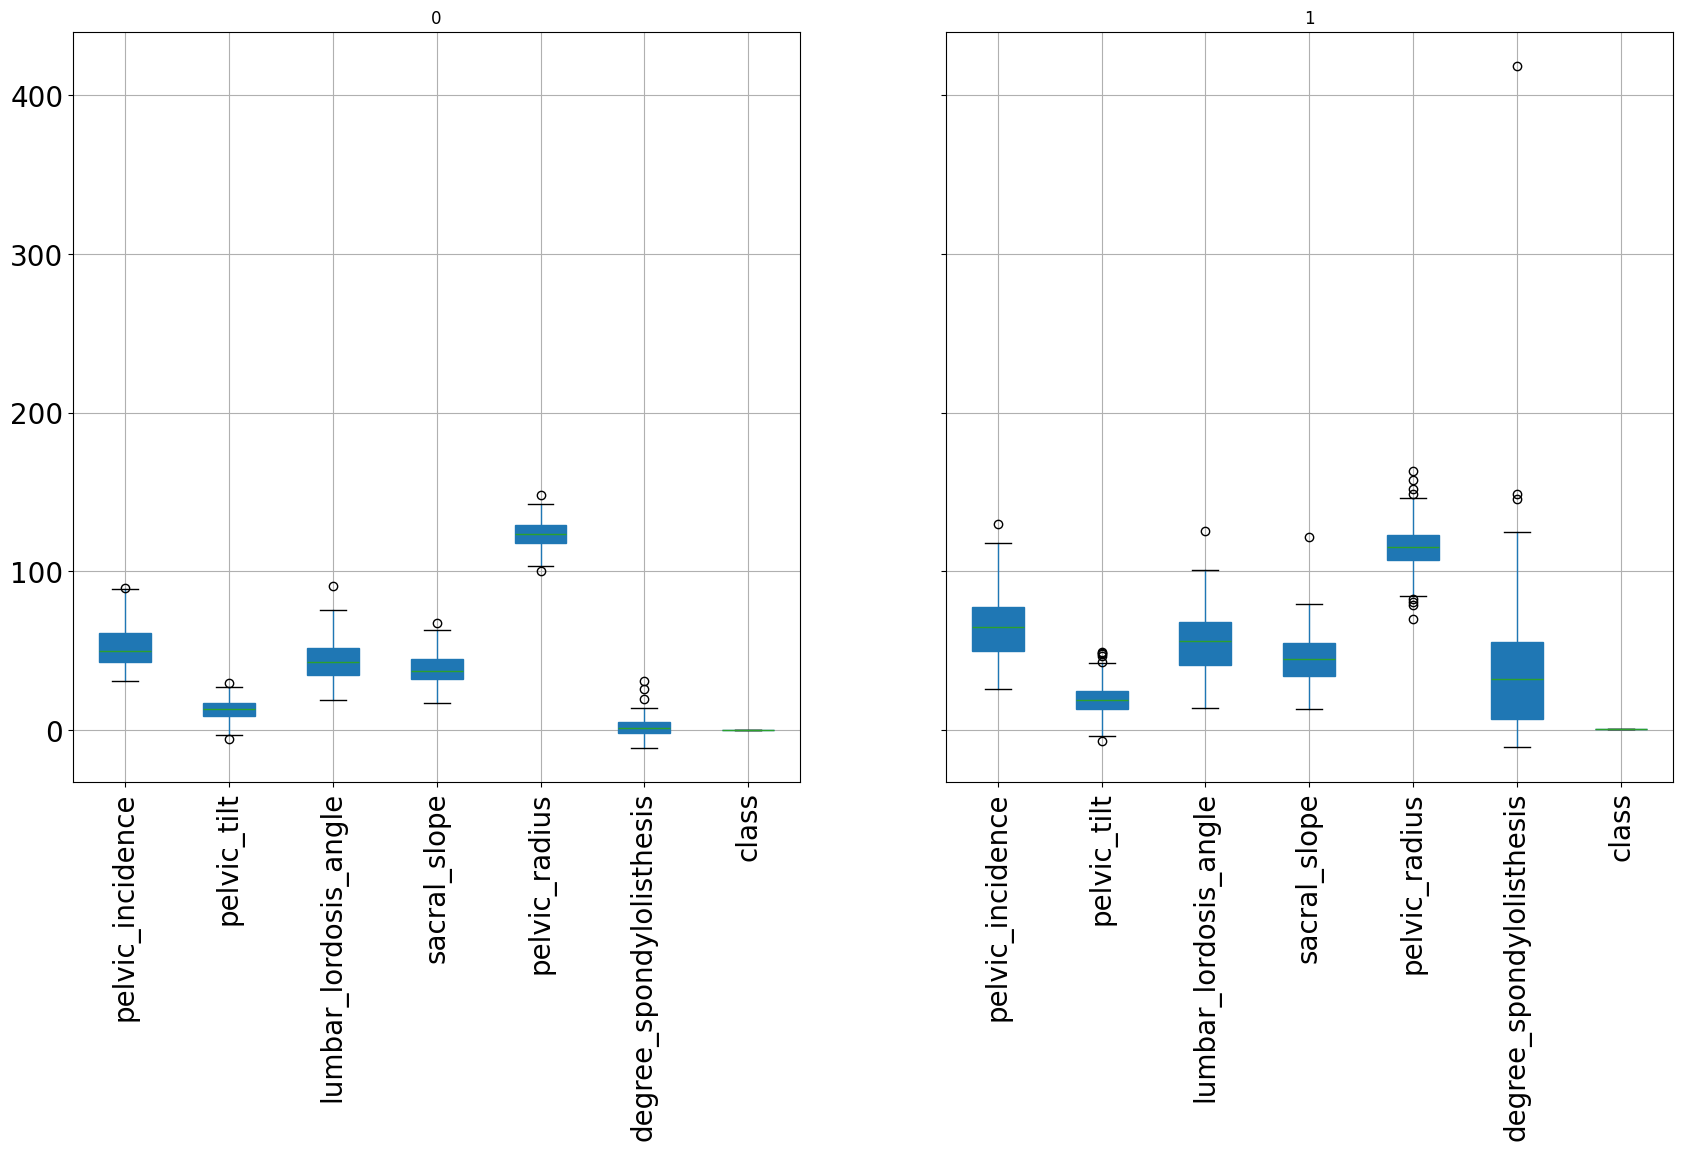

In [239]:
# Visualização das múltiplas variáveis
df.groupby('class').boxplot(fontsize=20, rot=90, figsize=(20, 10), patch_artist=True)

In [240]:
# Criação da matriz
corr_matrix = df.corr(numeric_only=True)
corr_matrix['class'].sort_values(ascending=False)

class                       1.000000
degree_spondylolisthesis    0.443687
pelvic_incidence            0.353336
pelvic_tilt                 0.326063
lumbar_lordosis_angle       0.312484
sacral_slope                0.210602
pelvic_radius              -0.309857
Name: class, dtype: float64

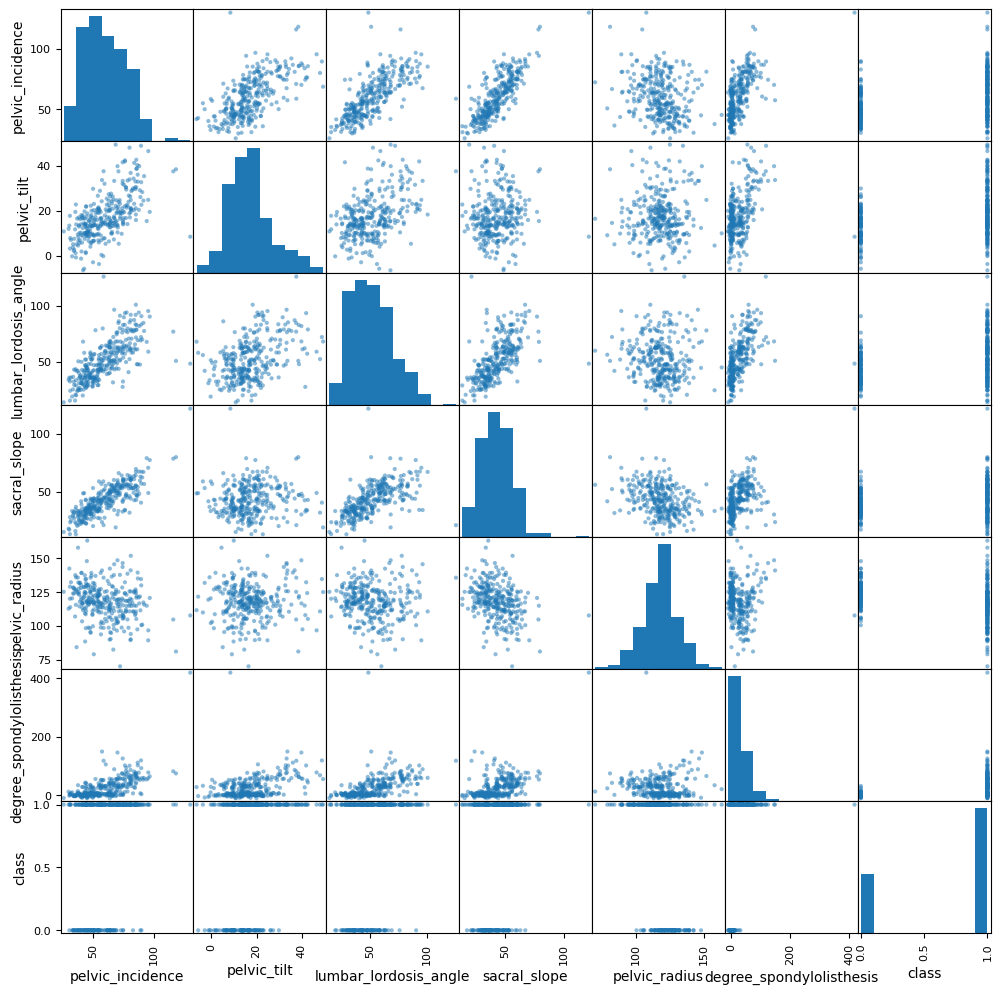

In [241]:
# Plotando os dados da matriz
pd.plotting.scatter_matrix(df, figsize=(12, 12))
plt.show()

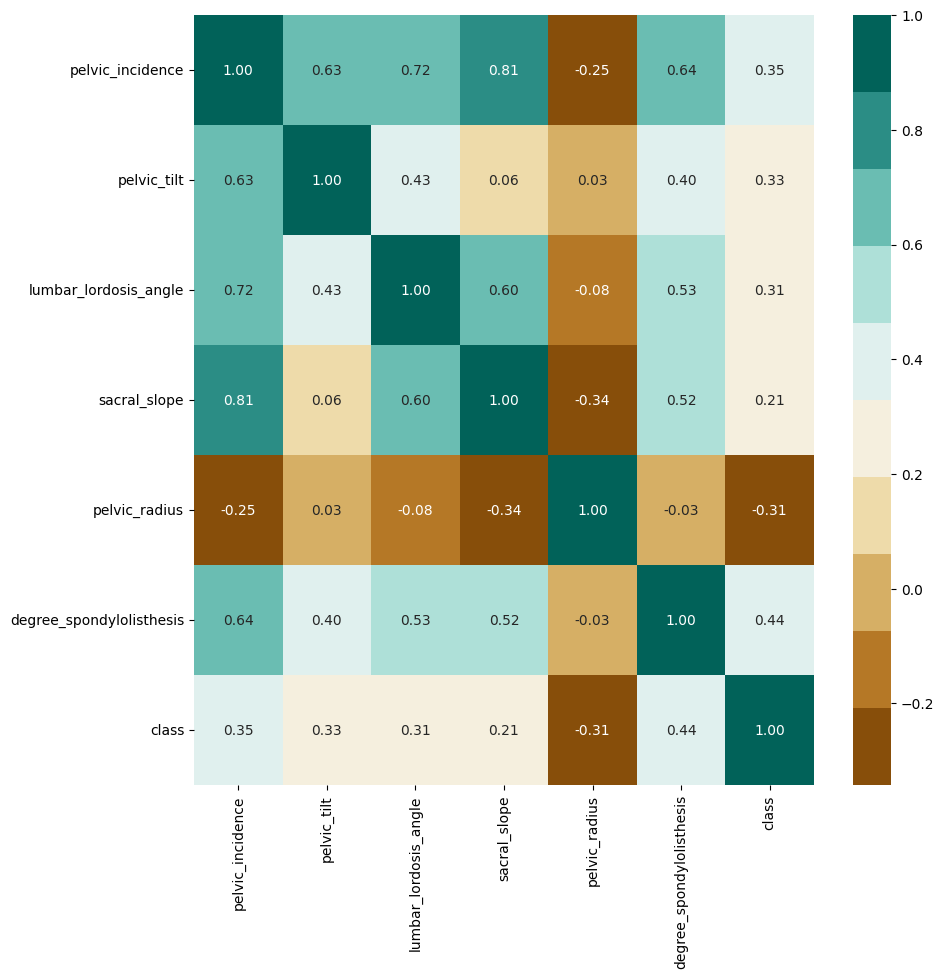

In [242]:
# Visualização das correlações com o heatmap
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.color_palette('BrBG', 10)
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt='.2f')

plt.show()